ChEn-3170: Computational Methods in Chemical Engineering Spring 2023 UMass Lowell; Prof. V. F. de Almeida **23Mar23**

# 10. Shortest Least-Squares Solver
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Introduction](#intro)
* [Any Linear System (Detailed Algorithm)](#any)
* [Shortest LSQ Solver](#usolver)
* [Anomalous Least-Squares Data Fitting](#fit)
---

## [Introduction](#toc)<a id="intro"></a>

Recall course notes OneNote [ChEn-3170-shortest-lsq-solver](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EgTyfAiTr59Dk3yAb3eCZEcBeJZj2oWviJeXKpeRIB2YOg?e=aTnFnR) on computational stoichiometry including an introduction to the linear, rank-deficient, least-squares method.

Compute the solution vector $\xvec$ for a given matrix $\Amtrx$ and right-side vector $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

When $\Amtrx$ is rank deficient, $\Amtrx^\top\Amtrx$ is also rank deficient (or singular). The normal equations 

\begin{equation*}
\boxed{\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec },
\end{equation*}

*either have an infinite number of solutions or have no solution*. 

Since $\Amtrx$ is rank deficient, a **unique** mininum-norm least squares solution, $\xvec_\text{MNLS}$, exists as follows,

\begin{equation*}
 \lim\limits_{\epsilon\rightarrow 0}\,\min\limits_\xvec \bigl( \norm{\bvec - \Amtrx\,\xvec_\text{MNLS}}^2 + \epsilon\norm{\xvec_\text{MNLS}}^2 \bigr) \quad\  \forall \quad\ \xvec.
\end{equation*}

This solution is obtained by solving:

\begin{equation*}
\boxed{
\lim\limits_{\epsilon\rightarrow 0}\,\bigl(\Amtrx^\top\Amtrx + \epsilon\Imtrx\bigr) \xvec_\text{MNLS}  = \Amtrx^\top\,\bvec },
\end{equation*}

where $\Amtrx^\top\Amtrx + \epsilon\Imtrx$ is square, symmetric and full rank. This augmented least-squares problem has a unique solution.

## [Any Linear System (Detailed Algorithm)](#toc)<a id="any"></a>
Refer to course Notebooks 08 and 09.

In [1]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -12.2
b =  88.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-8:] = 0.0
    if nrows < ncols:
        a_mtrx[-8:,:] = 0.0
        
np.set_printoptions(precision=3, threshold=500, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

A =
 [[ 24.552  29.015  58.732  -0.593 ...  39.087   4.024  69.683  59.268]
 [ 33.826  -0.206  -7.522 -10.05  ...  48.249   2.55   -7.276  33.565]
 [ 37.489  53.776  68.853  77.531 ...  31.552  15.838  -3.791  -0.091]
 [ 19.171  81.494   2.648  29.638 ...  52.463   5.656  67.064  49.817]
 ...
 [  0.      0.      0.      0.    ...   0.      0.      0.      0.   ]
 [  0.      0.      0.      0.    ...   0.      0.      0.      0.   ]
 [  0.      0.      0.      0.    ...   0.      0.      0.      0.   ]
 [  0.      0.      0.      0.    ...   0.      0.      0.      0.   ]]


In [2]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

S shape   =  (20, 32)
Rank of S =  12
Matrix is rank deficient.


In [3]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

b_vec =
 [ -4.016 -25.274 -35.608 -12.672 -36.276  -2.806 -40.165 -29.718 -18.872  -8.964 -16.832 -17.044
  -6.776  -0.992  -9.907  -3.692 -27.939 -28.996 -12.544 -26.75 ]


In [4]:
'''Compute the MNLS solution'''

import numpy as np

try:    
    from chen_3170.toolkit import solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

# build and solve A x = b MNLS problem

epsilon_values = np.logspace(+2,-6,5)

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)

x_norm_history = list()
    
for epsilon in epsilon_values:
    
    print('')
    print('epsilon = %1.1e'%epsilon)
    print('')

    mtrx = a_mtrx.transpose() @ a_mtrx + epsilon * np.eye(a_mtrx.shape[1]) # AT A + epsilon I, AT A is the normal matrix
    vec  = a_mtrx.transpose() @ b_vec                            # AT b

    # Solve (ATA + epsilon I) x = AT b
    x_vec = solve(mtrx, vec, pivot_tol=epsilon_values[-1], zero_tol=1e-9) # matrix is full rank
    #x_vec = np.linalg.solve(mtrx, vec) # if my solver does not work
        
    x_norm = np.linalg.norm(x_vec)
    print('||x|| = %8.5e'%x_norm)
    
    x_norm_history.append(x_norm) # save for plotting
    
    # test my solution against NumPy solve
    print('max(abs(x_vec-x_vec_numpy)) = %2.2e'%np.max(np.abs((x_vec - np.linalg.solve(mtrx, vec)))))
    
    print('')
    residual_vec = b_vec - a_mtrx @ x_vec
    print('||b - A x||^2 + eps*||x||^2 = %8.5e'%(np.linalg.norm(residual_vec)**2 + epsilon*x_norm**2))
    print('||(ATA-epsI)x - ATb||       = %8.5e'%(np.linalg.norm(mtrx@x_vec-a_mtrx.transpose()@b_vec)))
    print('||b - A x|| +       ||x||   = %8.5e'%(np.linalg.norm(residual_vec) + x_norm))
    print('||b - A x||                 = %8.5e'%(np.linalg.norm(residual_vec)))


epsilon = 1.0e+02

||x|| = 3.18068e-01
max(abs(x_vec-x_vec_numpy)) = 3.31e-14

||b - A x||^2 + eps*||x||^2 = 2.66316e+03
||(ATA-epsI)x - ATb||       = 1.16827e-11
||b - A x|| +       ||x||   = 5.18258e+01
||b - A x||                 = 5.15077e+01

epsilon = 1.0e+00

||x|| = 3.20212e-01
max(abs(x_vec-x_vec_numpy)) = 2.98e-12

||b - A x||^2 + eps*||x||^2 = 2.65308e+03
||(ATA-epsI)x - ATb||       = 1.55148e-11
||b - A x|| +       ||x||   = 5.18272e+01
||b - A x||                 = 5.15070e+01

epsilon = 1.0e-02

||x|| = 3.20234e-01
max(abs(x_vec-x_vec_numpy)) = 2.47e-10

||b - A x||^2 + eps*||x||^2 = 2.65297e+03
||(ATA-epsI)x - ATb||       = 1.04493e-11
||b - A x|| +       ||x||   = 5.18273e+01
||b - A x||                 = 5.15070e+01

epsilon = 1.0e-04

||x|| = 3.20234e-01
max(abs(x_vec-x_vec_numpy)) = 3.03e-08

||b - A x||^2 + eps*||x||^2 = 2.65297e+03
||(ATA-epsI)x - ATb||       = 1.58576e-11
||b - A x|| +       ||x||   = 5.18273e+01
||b - A x||                 = 5.15070e+01

epsilon

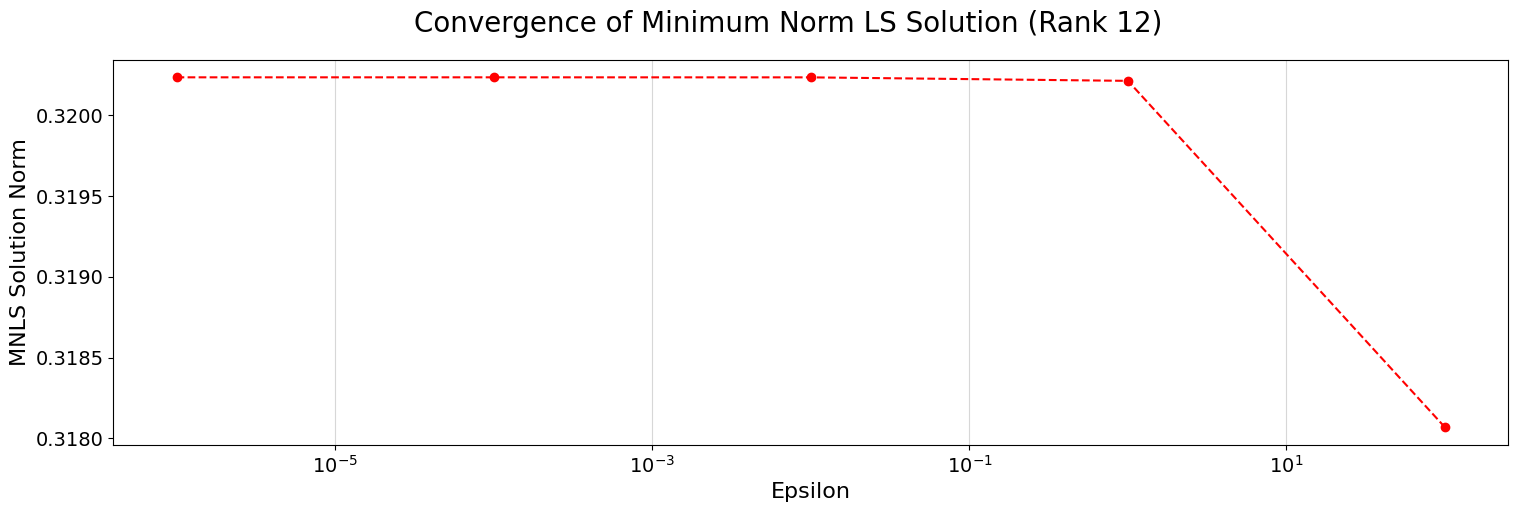

In [5]:
'''Plot Convergence of the Shortest Least-Square Solution Vector'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
#%matplotlib inline
#plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(18,5))
ax.semilogx(epsilon_values, x_norm_history,'ro--')
ax.set_ylabel('MNLS Solution Norm',fontsize=16)
ax.set_xlabel('Epsilon',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.suptitle('Convergence of Minimum Norm LS Solution (Rank %s)'%str(a_rank),fontsize=20)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
plt.show()

**NB:** Note that the associated rank-deficient $\Amtrx\xvec=\bvec$ has not solution. The computed $\xvec$ is the shortest LS solution of the modified (*regularized*) LS problem.

In [6]:
print('||AT(b - A x)|| = %8.5e'%(np.linalg.norm(a_mtrx.transpose()@residual_vec)))

||AT(b - A x)|| = 3.20229e-07


**NB:** For example take a non-zero vector, $\yvec$, from the null space of $\Amtrx$, *i.e.* $\Amtrx\yvec=\zerovec$. $\yvec$ will be perpendicular to $\xvec$.

In [7]:
y0_vec = np.random.random(a_mtrx.shape[1])
y_vec = solve(a_mtrx, b_vec*0, y0_vec, zero_tol=1e-10)
print('||y||        = %8.5e'%(np.linalg.norm(y_vec)))
print('||A y)||     = %8.5e'%(np.linalg.norm(a_mtrx@y_vec)))
print('||b - A y)|| = %8.5e'%(np.linalg.norm((b_vec-a_mtrx@y_vec))))
print('y . x        = %8.5e'%(np.dot(y_vec, x_vec)))

||y||        = 5.70082e+00
||A y)||     = 2.68976e-13
||b - A y)|| = 9.78109e+01
y . x        = -8.46155e-06


**NB:** More trials.

In [8]:
a = 2*x_vec.min()
b = 2*x_vec.max()

for i in range(10):
    y0_vec = (b-a)*np.random.random(ncols) + a
    y_vec = solve(a_mtrx, b_vec*0, y0_vec, zero_tol=1e-10)
    print('||y||       = %8.5e'%(np.linalg.norm(y_vec)))
    print('||b - A y|| = %8.5e'%(np.linalg.norm((b_vec-a_mtrx@y_vec))))
    print('y . x       = %8.5e'%(np.dot(y_vec, x_vec)))
    print('')

||y||       = 1.15477e+00
||b - A y|| = 9.78109e+01
y . x       = 1.96165e-06

||y||       = 8.75726e-01
||b - A y|| = 9.78109e+01
y . x       = 5.17780e-07

||y||       = 1.43878e+00
||b - A y|| = 9.78109e+01
y . x       = -1.42433e-06

||y||       = 7.23075e-01
||b - A y|| = 9.78109e+01
y . x       = -2.66869e-06

||y||       = 1.01182e+00
||b - A y|| = 9.78109e+01
y . x       = -1.47942e-06

||y||       = 7.14654e-01
||b - A y|| = 9.78109e+01
y . x       = 1.43957e-06

||y||       = 7.63096e-01
||b - A y|| = 9.78109e+01
y . x       = -1.83350e-06

||y||       = 6.04196e-01
||b - A y|| = 9.78109e+01
y . x       = -1.90721e-08

||y||       = 8.90934e-01
||b - A y|| = 9.78109e+01
y . x       = 1.17691e-06

||y||       = 9.35650e-01
||b - A y|| = 9.78109e+01
y . x       = 8.72057e-07



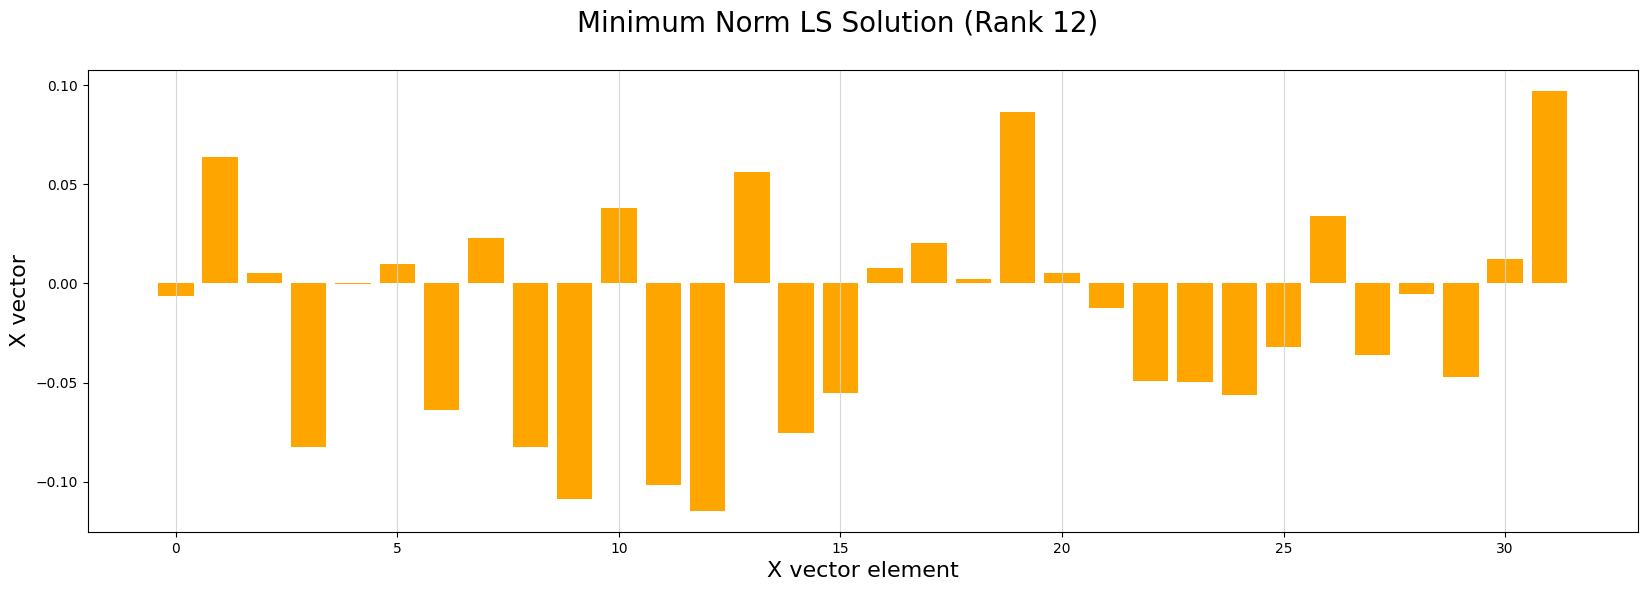

In [9]:
'''Minimum-norm least-squares solution'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
#%matplotlib inline
#plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Solution (Rank %s)'%str(a_rank),fontsize=20)
plt.show()

## [Shortest LSQ Solver](#toc)<a id="usolver"></a>

Compute the solution vector $\xvec$, given $\Amtrx$ and $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

In [10]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -120.2
b =  808.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a
a_mtrx /= a_mtrx.max()

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-1] = 0.0
    if nrows < ncols:
        a_mtrx[-1,:] = 0.0
        
np.set_printoptions(precision=3, threshold=100, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

A =
 [[ 0.863  0.583  0.377  0.069 ...  0.191  0.048 -0.118  0.058]
 [ 0.035  0.17   0.362  0.262 ...  0.157  0.713  0.817  0.998]
 [ 0.926  0.044  0.167  0.569 ... -0.036  0.29   0.546  0.715]
 [ 0.201 -0.003  0.426  0.912 ...  0.563  0.851  0.743  0.17 ]
 ...
 [ 0.801 -0.067  0.459  0.132 ...  0.645  0.909  0.924  0.521]
 [-0.018  0.96  -0.089  0.864 ...  0.505  0.128 -0.035  0.162]
 [ 0.789  0.616  0.835  0.171 ...  0.977  0.176  0.192  0.902]
 [ 0.     0.     0.     0.    ...  0.     0.     0.     0.   ]]


In [11]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

S shape   =  (20, 32)
Rank of S =  19
Matrix is rank deficient.


In [12]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

b_vec =
 [-24.213  -8.228 -13.012 -10.038  -4.693 -15.365  -0.741  -7.203 -20.229  -1.275  -2.118 -40.177
  -5.188 -34.139 -16.925 -14.515   2.789  -0.661 -16.197 -39.688]


In [13]:
import numpy as np

try:    
    from chen_3170.toolkit import shortest_least_squares_solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

x_vec = shortest_least_squares_solve(a_mtrx, b_vec, verbose=False, solver_verbose=False)

print('Magnitude of residual vector: ||b - Ax|| = %3.3e'%np.linalg.norm(b_vec-a_mtrx@x_vec))
print('Magnitude of residual vector of the normal equations: ||AT(b - Ax)|| = %3.3e'%np.linalg.norm(a_mtrx.transpose()@(b_vec-a_mtrx@x_vec)))

Magnitude of residual vector: ||b - Ax|| = 3.969e+01
Magnitude of residual vector of the normal equations: ||AT(b - Ax)|| = 4.112e-07


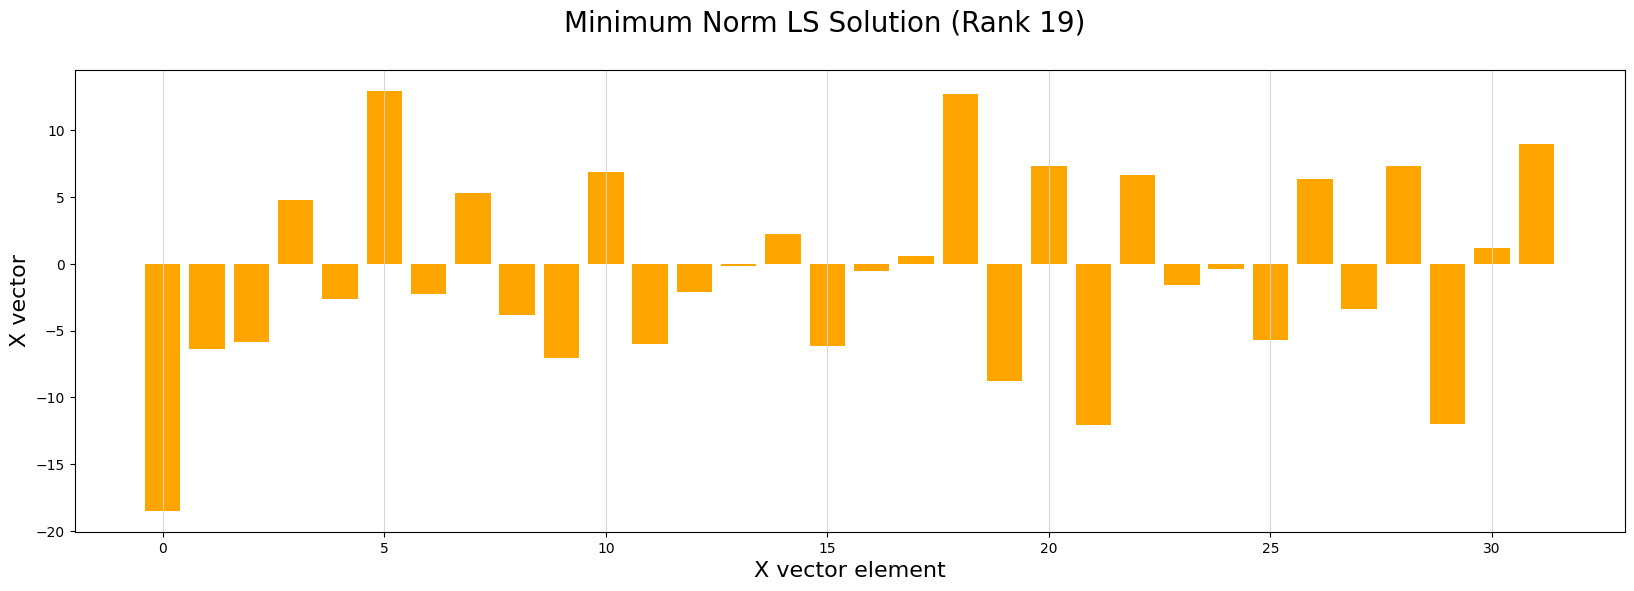

In [14]:
'''Minimum norm least-squares solution'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
#%matplotlib inline
#plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Solution (Rank %s)'%str(a_rank),fontsize=20)
plt.show()

## [Anomalous Linear Least-Squares Data Fitting](#toc)<a id="fit"></a>

Example of data fitting where the universal solver is the only way to find a satisfactory fit.

In [ ]:
import numpy as np

m_pts = 7

x_values = 1*np.ones(m_pts)
y_values = 1.12 * abs(np.random.random(m_pts))

a_mtrx = np.zeros((m_pts, 2))
a_mtrx[:,0] = np.ones(m_pts)
a_mtrx[:,1] = -x_values


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
    
plt.figure(1, figsize=(7, 7))

plt.plot(x_values, y_values, 'r*', label='experimental')
    
plt.xlabel(r'$x$ []',fontsize=14)
plt.ylabel(r'$y$ []',fontsize=14)
plt.xlim(min(x_values)-.1, max(x_values)+.1)
plt.title('Some Arbitrary Data',fontsize=20)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

rank = matrix_rank(a_mtrx)

if rank == min(np.shape(a_mtrx)):
    print('Full-rank matrix')
else:
    print('Rank-deficient matrix')
print('matrix rank = ', rank)

In [ ]:
try:    
    from chen_3170.toolkit import shortest_least_squares_solve  
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'
    
x_vec = shortest_least_squares_solve(a_mtrx, y_values)

#this will not work: x_vec = solve(a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@y_values, pivot_tol=1e-7)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
    
plt.figure(1, figsize=(7, 7))

n_plot_pts = 15
x_plot = np.linspace(min(x_values)-.01, max(x_values)+.01, n_plot_pts)
a_mtrx_x = np.ones((n_plot_pts, 2))
a_mtrx_x[:,1]= -x_plot

plt.plot(x_values, y_values,'r*',label='experimental')
plt.plot(x_plot, a_mtrx_x@x_vec,'y*',label='MNLS')
    
plt.xlabel(r'$x$ []',fontsize=14)
plt.xlim(min(x_values)-.01, max(x_values)+.01)
plt.ylabel(r'$y$ []',fontsize=14)
plt.title('Linear Least-Squared Approximation',fontsize=20)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
y_values

In [ ]:
y_values.mean()

In [ ]:
a_mtrx_x@x_vec

In [ ]:
(a_mtrx_x@x_vec).mean()